Submitted By: Priyanshi Singh (ps4609)

# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

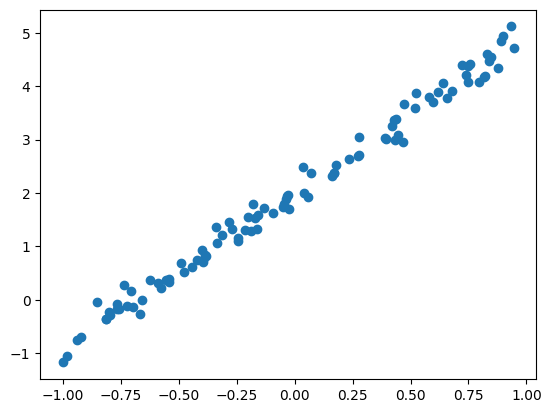

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [ ]:
# Analytical Model

#Calculate the mean of xd and yd:
x_mean = np.mean(xd)
y_mean = np.mean(yd)

#Calculate the deviations of xd and yd from their means:
x_dev = xd - x_mean
y_dev = yd - y_mean

#Calculate the slope (β1) and intercept (β0) using the formulas:
beta1 = np.dot(x_dev, y_dev) / np.dot(x_dev, x_dev)
beta0 = y_mean - beta1 * x_mean

analyticalModel = np.array([beta0, beta1])

print("Analytical Model Coefficients:", analyticalModel)

Analytical Model Coefficients: [2.01235405 2.92967118]


### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same.

**Analytical Model Result**

In [ ]:
#evaluate your model

# New data
xplot = np.linspace(-1, 1, 100)  # Generate uniform points between -1 and 1

# Prediction using the analytical model
ypredict = analyticalModel[0] + analyticalModel[1] * xplot


In [ ]:
ypredict

array([-0.91731712, -0.85813185, -0.79894657, -0.7397613 , -0.68057602,
       -0.62139074, -0.56220547, -0.50302019, -0.44383491, -0.38464964,
       -0.32546436, -0.26627908, -0.20709381, -0.14790853, -0.08872326,
       -0.02953798,  0.0296473 ,  0.08883257,  0.14801785,  0.20720313,
        0.2663884 ,  0.32557368,  0.38475895,  0.44394423,  0.50312951,
        0.56231478,  0.62150006,  0.68068534,  0.73987061,  0.79905589,
        0.85824117,  0.91742644,  0.97661172,  1.03579699,  1.09498227,
        1.15416755,  1.21335282,  1.2725381 ,  1.33172338,  1.39090865,
        1.45009393,  1.50927921,  1.56846448,  1.62764976,  1.68683503,
        1.74602031,  1.80520559,  1.86439086,  1.92357614,  1.98276142,
        2.04194669,  2.10113197,  2.16031725,  2.21950252,  2.2786878 ,
        2.33787307,  2.39705835,  2.45624363,  2.5154289 ,  2.57461418,
        2.63379946,  2.69298473,  2.75217001,  2.81135529,  2.87054056,
        2.92972584,  2.98891111,  3.04809639,  3.10728167,  3.16

**Polyfit Model Prediction**

In [ ]:
# Polyfit Model
polyfitModel = np.polyfit(xd, yd, 1)

# Evaluate the polyfit model
yfit = np.polyval(polyfitModel, xplot)

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

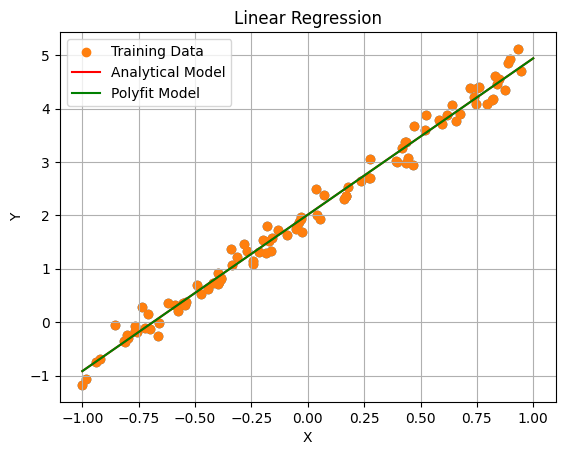

In [ ]:
#plot your results
fig, ax = plt.subplots()
ax.scatter(xd, yd)
ax.scatter(xd, yd, label='Training Data')

# Plot polyfit model and analytical model results
ax.plot(xplot, ypredict, label='Analytical Model', color='red')
ax.plot(xplot, yfit, label='Polyfit Model', color='green')

ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
ax.legend()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

# Split the data into 70% training and 30% test
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Display the first few rows of the training and test sets
print("Training Data:")
print(train.head())

print("\nTest Data:")
print(test.head())

Training Data:
        TV  radio  newspaper  sales
170  284.3   10.6        6.4   15.0
98   184.9   21.0       22.0   15.5
32   112.9   17.4       38.6   11.9
13    23.8   35.1       65.9    9.2
36   290.7    4.1        8.5   12.8

Test Data:
        TV  radio  newspaper  sales
96   163.3   31.6       52.9   16.9
16   195.4   47.7       52.9   22.4
31   292.9   28.3       43.2   21.4
159   11.7   36.9       45.2    7.3
129  220.3   49.0        3.2   24.7


### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [ ]:
sales_TV_beta     = # Use function or your own code to do linear regression
sales_newspaper_beta  = #
sales_radio_beta    = #

In [ ]:
from sklearn.linear_model import LinearRegression

# Extract the features (advertising on TV, newspaper, and radio) and the target variable (sales)
X_tv = train[['TV']]
X_newspaper = train[['newspaper']]
X_radio = train[['radio']]
y = train['sales']

# Create LinearRegression models for each advertising medium
model_tv = LinearRegression()
model_newspaper = LinearRegression()
model_radio = LinearRegression()

# Fit the models to the data
model_tv.fit(X_tv, y)
model_newspaper.fit(X_newspaper, y)
model_radio.fit(X_radio, y)

# Get the coefficients (beta values) for each model
sales_TV_beta = model_tv.coef_[0]
sales_newspaper_beta = model_newspaper.coef_[0]
sales_radio_beta = model_radio.coef_[0]

print("Sales vs. TV Advertising Beta:", sales_TV_beta)
print("Sales vs. Newspaper Advertising Beta:", sales_newspaper_beta)
print("Sales vs. Radio Advertising Beta:", sales_radio_beta)

Sales vs. TV Advertising Beta: 0.046407802128152764
Sales vs. Newspaper Advertising Beta: 0.06093416696535276
Sales vs. Radio Advertising Beta: 0.21926677369021058


### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

In [ ]:
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
'''
  Your code
'''

## Sales to newspaper spend
plt.subplot(1,3,2)
'''
  Your code
'''

## Sales to radio spend
plt.subplot(1,3,3)
'''
  Your code
'''


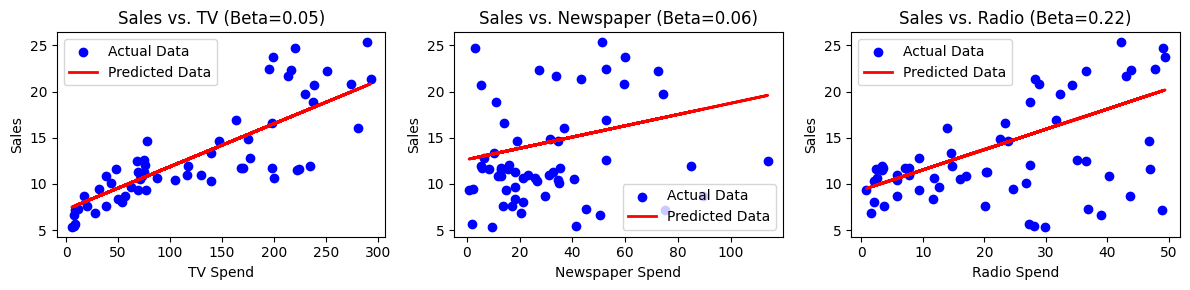

In [ ]:

import matplotlib.pyplot as plt

# Predict sales using each model
y_pred_tv = model_tv.predict(test[['TV']])
y_pred_newspaper = model_newspaper.predict(test[['newspaper']])
y_pred_radio = model_radio.predict(test[['radio']])

# Create subplots for each advertising medium
fig = plt.figure(figsize=(12, 3))

# Sales vs. TV spend
plt.subplot(1, 3, 1)
plt.scatter(test[['TV']], test[['sales']], color='blue', label='Actual Data')
plt.plot(test[['TV']], y_pred_tv, color='red', linewidth=2, label='Predicted Data')
plt.title(f'Sales vs. TV (Beta={sales_TV_beta:.2f})')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.legend()

# Sales vs. newspaper spend
plt.subplot(1, 3, 2)
plt.scatter(test[['newspaper']], test[['sales']], color='blue', label='Actual Data')
plt.plot(test[['newspaper']], y_pred_newspaper, color='red', linewidth=2, label='Predicted Data')
plt.title(f'Sales vs. Newspaper (Beta={sales_newspaper_beta:.2f})')
plt.xlabel('Newspaper Spend')
plt.ylabel('Sales')
plt.legend()

# Sales vs. radio spend
plt.subplot(1, 3, 3)
plt.scatter(test[['radio']], test[['sales']], color='blue', label='Actual Data')
plt.plot(test[['radio']], y_pred_radio, color='red', linewidth=2, label='Predicted Data')
plt.title(f'Sales vs. Radio (Beta={sales_radio_beta:.2f})')
plt.xlabel('Radio Spend')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [ ]:
# Define training X matrix (including the intercept term)
X = np.vstack((np.ones(train.shape[0]), train['newspaper'], train['radio'], train['TV']))

# Transpose the X matrix to match the shape of trainY
trainX = X.transpose()

# Define training Y matrix
trainY = train['sales']

# Calculate the multivariate beta using the closed-form expression
multivariate_beta = np.linalg.inv(trainX.T @ trainX) @ trainX.T @ trainY

print("Multivariate Beta:", multivariate_beta)

Multivariate Beta: [2.70894909 0.00688245 0.1992875  0.04405928]


### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [ ]:
# Define testing X matrix (including the intercept term)
X = np.vstack((np.ones(test.shape[0]), test['newspaper'], test['radio'], test['TV']))

# Transpose the X matrix to match the shape of testY
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predict results using your multivariate model (multivariate_beta)
pred = testX @ multivariate_beta


### Plot Result

**Q9**: Plot your predictions against real labels.

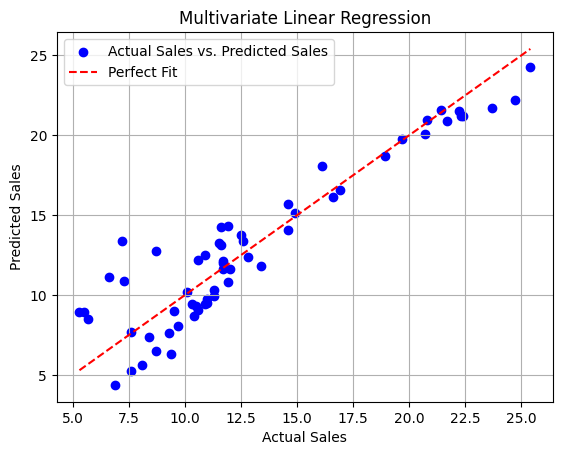

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the actual sales vs. predicted sales
ax.scatter(testY, pred, color='blue', label='Actual Sales vs. Predicted Sales')
ax.plot([min(testY), max(testY)], [min(testY), max(testY)], linestyle='--', color='red', label='Perfect Fit')
ax.set(xlabel='Actual Sales', ylabel='Predicted Sales', title='Multivariate Linear Regression')
ax.legend()
ax.grid()
plt.show()
